In [1]:
from astropy.io import fits
import pcmdpy as ppy
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pyregion
%matplotlib inline

In [2]:
f = ppy.instrument.default_m31_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)

In [6]:
bulge_charlie = np.loadtxt('../data/m31/pcmds/m31_bulge_M2.dat', unpack=True)

In [7]:
disk_charlie = np.loadtxt('../data/m31/pcmds/m31_b06-263.dat', unpack=True)

In [94]:
bulge_F814W = fits.open('../data/m31/raw/hlsp_phat_hst_acs-wfc_12058-m31-b01_f814w_v1_drz.fits')
bulge_F475W = fits.open('../data/m31/raw/hlsp_phat_hst_acs-wfc_12058-m31-b01_f475w_v1_drz_ALIGNED.fits')

In [96]:
bulge_region = pyregion.open('../data/m31/masks/bulge_slice.reg').as_imagecoord(header=bulge_F814W[0].header)

In [97]:
bulge_mask = bulge_region[0:1].get_mask(shape=bulge_F814W['SCI'].shape) & bulge_region[1:2].get_mask(shape=bulge_F814W['SCI'].shape)

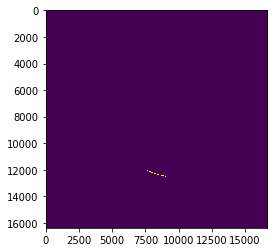

In [98]:
plt.imshow(bulge_mask)

In [23]:
np.sum(bulge_mask), len(bulge_true[0])

(79327, 79278)

In [29]:
## Exposure will get divided out when converting to mags, so our choice doesn't matter
im_F814W = bulge_F814W['SCI'].data[bulge_mask] * F814W._exposure
im_F475W = bulge_F475W['SCI'].data[bulge_mask] * F475W._exposure

In [61]:
mag_F814W = F814W.counts_to_mag(im_F814W, mag_system='ab') - 24.47
mag_F475W = F475W.counts_to_mag(im_F475W, mag_system='ab') - 24.47

In [62]:
bulge_manual = np.array([mag_F814W, mag_F475W - mag_F814W])

In [63]:
bulge_manual

array([[1.0859909 , 1.1126575 , 0.9399166 , ..., 0.87840843, 0.94512177,
        0.9234886 ],
       [1.2775173 , 1.3263874 , 1.385397  , ..., 1.1547585 , 1.1622181 ,
        1.1025181 ]], dtype=float32)

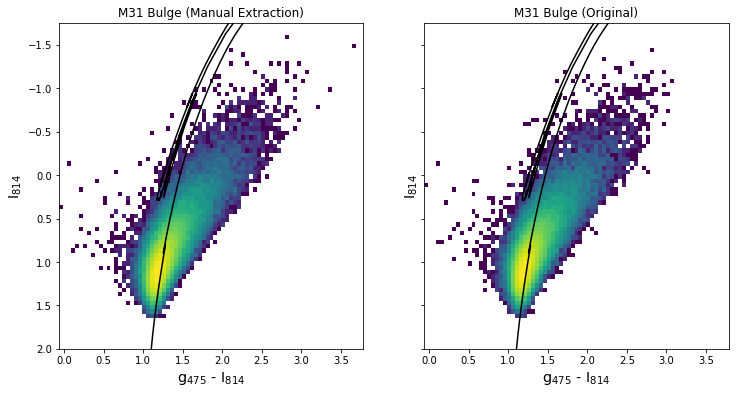

In [130]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6), sharex=True, sharey=True)
_, _, bins, norm = ppy.plotting.plot_pcmd(bulge_manual, axes=axes[0]);
ppy.plotting.plot_pcmd(bulge_true, axes=axes[1], bins=bins, norm=norm);
for a in axes:
    ppy.plotting.plot_isochrone(iso_model, dmod=0., axes=a, mag_system='ab')
axes[0].set_ylim(ymin=2.)
axes[0].set_title('M31 Bulge (Manual Extraction)')
axes[1].set_title('M31 Bulge (Original)')
plt.savefig('figures/m31_bulge_extraction.jpg')

In [91]:
disk_F814W = fits.open('../data/m31/raw/hlsp_phat_hst_acs-wfc_12105-m31-b06_f814w_v1_drz.fits')
disk_F475W = fits.open('../data/m31/raw/hlsp_phat_hst_acs-wfc_12105-m31-b06_f475w_v1_drz_ALIGNED.fits')

In [93]:
disk_region = pyregion.open('../data/m31/masks/disk_slice.reg').as_imagecoord(header=disk_F814W[0].header)

In [99]:
disk_mask = disk_region.get_mask(shape=disk_F814W['SCI'].shape)

In [101]:
## Exposure will get divided out when converting to mags, so our choice doesn't matter
im_F814W = disk_F814W['SCI'].data[disk_mask] * F814W._exposure
im_F475W = disk_F475W['SCI'].data[disk_mask] * F475W._exposure

In [102]:
mag_F814W = F814W.counts_to_mag(im_F814W, mag_system='ab') - 24.47
mag_F475W = F475W.counts_to_mag(im_F475W, mag_system='ab') - 24.47
disk_manual = np.array([mag_F814W, mag_F475W - mag_F814W])

In [104]:
disk_manual

array([[2.5045605 , 2.901167  , 3.1059685 , ..., 3.0472164 , 3.0082874 ,
        2.8857422 ],
       [0.76882553, 0.71396637, 0.8068485 , ..., 0.8363571 , 0.8547878 ,
        0.8323326 ]], dtype=float32)

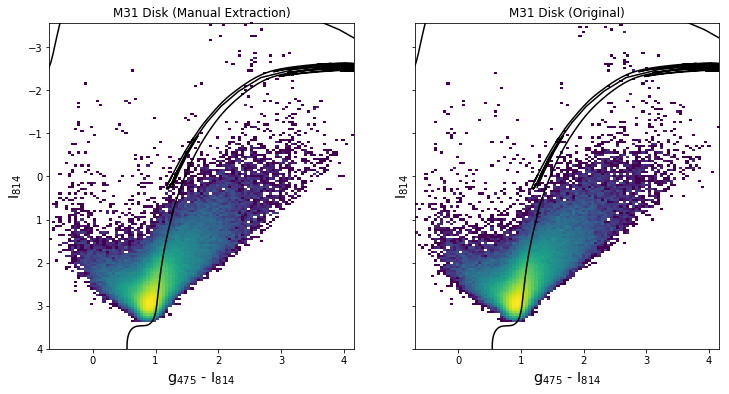

In [129]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6), sharex=True, sharey=True)
_, _, bins, norm = ppy.plotting.plot_pcmd(disk_manual, axes=axes[0]);
ppy.plotting.plot_pcmd(disk_true, axes=axes[1], bins=bins, norm=norm);
for a in axes:
    ppy.plotting.plot_isochrone(iso_model, dmod=0., axes=a, mag_system='ab')
axes[0].set_ylim(ymin=4) 
axes[0].set_title('M31 Disk (Manual Extraction)')
axes[1].set_title('M31 Disk (Original)')
plt.savefig('figures/m31_disk_extraction.jpg')

In [113]:
len(bulge_manual[0]), len(bulge_true[0])

(79327, 79278)

In [114]:
len(disk_manual[0]), len(disk_true[0])

(259381, 259296)